# Honor 2 视觉感知


## 幻视

人类观察需要集中注意力。且观察主要基于对比（相对性）。

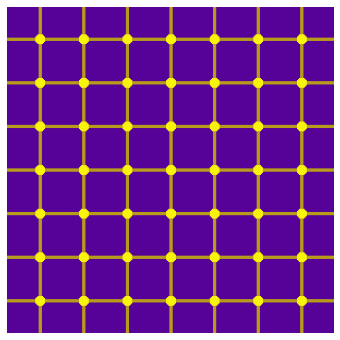

In [33]:
from matplotlib import pyplot as plt
import numpy as np
N = 300
r, w = 3, 40
X, coors = np.zeros((N,N, 3), dtype = 'uint8'), np.meshgrid(np.arange(-N//2,N//2),np.arange(N//2,-N//2,-1))
X[:,:] = np.array([86,2,152])
mm = lambda x: (w/2 + x) % w - w/2
for i, c in enumerate((183, 156, 27)):
    X[:,:,i] = np.where((abs(mm(coors[0])) < r/2) | (abs(mm(coors[1])) < r/2), c, X[:,:,i])
for i, c in enumerate((248, 243, 10)):
    X[:,:,i] = np.where(mm(coors[0])**2 + mm(coors[1])**2 < 2.5*r*r, c, X[:,:,i])
plt.figure(figsize = (6, 6))
plt.imshow(X)
plt.axis('off')
plt.show()

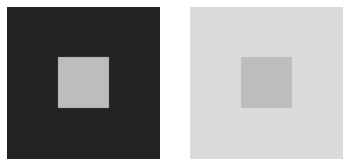

In [34]:
from matplotlib import pyplot as plt 
import numpy as np 
A = np.full((96, 96), 35, dtype='uint8')
A[32:-32,32:-32] = 189
B = np.full((96, 96), 219, dtype='uint8')
B[32:-32,32:-32] = 189
plt.subplot(1,2,1)
plt.imshow(A, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(B, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.show()

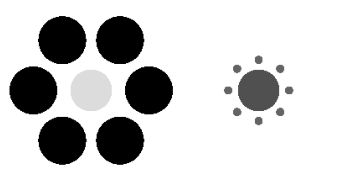

In [72]:
from matplotlib import pyplot as plt
import numpy as np
N = 200
r, w = 3, 40
data, coors = np.full((N, N*2, 3), 255, dtype = 'uint8'), np.meshgrid(np.arange(-N//2,N//2),np.arange(N//2,-N//2,-1))
circ = lambda x, y, r: np.tile(((coors[0] - x)**2 + (coors[1] - y)**2 < r**2).reshape((N,N,1)), (1,1,3))
data[:,:N,:] = np.where(circ(0,0,N//8), 220, 255)
data[:,N:,:] = np.where(circ(0,0,N//8), 80, 255)
r = N / 2.9
for i in range(6):
    t = np.pi * 2 * (i / 6)
    data[:,:N,:] = np.where(circ(r * np.cos(t), r * np.sin(t), N/7), 0, data[:,:N,:])
r = N / 5.5
for i in range(8):
    t = np.pi * 2 * (i / 8)
    data[:,N:,:] = np.where(circ(r * np.cos(t), r * np.sin(t), N/40), 100, data[:,N:,:])
plt.imshow(data)
plt.axis('off')
plt.show()

## 注意力机制

颜色 > 形状

In [78]:
x = '1281768756138976546984506985604982826762980985845822450985645894509845098094358590910302099059595957725646750506789045678845789809821677654876364908560912949686'
print('在如下文字中找到数字3的个数\n'+'\n'.join(x[i:i+40] for i in range(0,160,40)))
print('\n在如下文字中找到数字3的个数\n'+'\n'.join(\
    ''.join(map(lambda x:'\033[%sm%s\033[0m'%('1;30' if x=='3' else '36',x),x[i:i+40])) for i in range(0,160,40)))

在如下文字中找到数字3的个数
1281768756138976546984506985604982826762
9809858458224509856458945098450980943585
9091030209905959595772564675050678904567
8845789809821677654876364908560912949686

在如下文字中找到数字3的个数
1281768756138976546984506985604982826762
9809858458224509856458945098450980943585
9091030209905959595772564675050678904567
8845789809821677654876364908560912949686


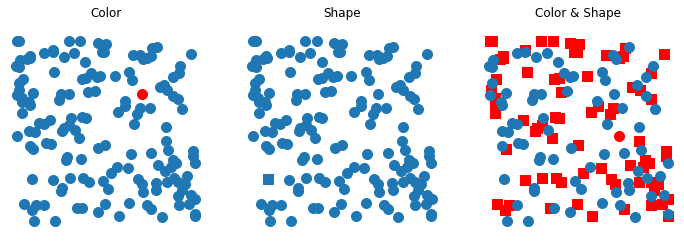

In [135]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(2022)
N = 150
data = np.random.random((2, N))
plt.figure(figsize = (12, 4))
for i in range(1,4):
    plt.subplot(1,3,i)
    if i == 1:
        plt.scatter(data[0][:-1], data[1][:-1], s = 100)
        plt.scatter(data[0][-1], data[1][-1], s = 100, c = 'red')
    elif i == 2:
        plt.scatter(np.concatenate((data[0,:-3],data[0,-2:])), 
                    np.concatenate((data[1,:-3],data[1,-2:])), s = 100)
        plt.scatter(data[0][-3], data[1][-3], s = 100, marker = 's', c = '#1f77b4')
    elif i == 3:
        plt.scatter(data[0,1:N//2], data[1,1:N//2], s = 100, c = 'red', marker = 's')
        plt.scatter(data[0,N//2:], data[1,N//2:], s = 100, c = '#1f77b4', marker = 'o')
        plt.scatter(data[0,9], data[1,0], s = 100, c = 'red', marker = 'o')
    plt.xlim(0.1,.9)
    plt.ylim(-.1,1.1)
    plt.axis('equal')
    plt.axis('off')
    plt.title(('','Color','Shape','Color & Shape')[i])
plt.show()

## 格式塔理论

结构比元素更重要, 整体大于局部.

接近性 (proximity) > 相似性 (similarity) > 连续性 (continuity) , 闭合性 (closure) , 简单性 (similarity)

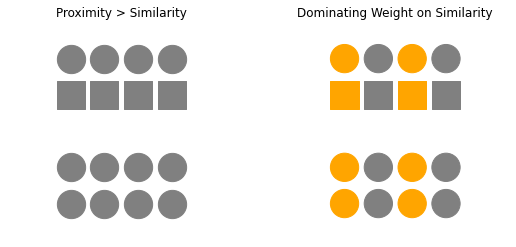

In [136]:
# 接近性、相似性
from matplotlib import pyplot as plt
import numpy as np
data = [np.linspace(0,.8,4).tolist()*3, [-.2]*4+[.1]*4+[1]*4]
data2 = [np.linspace(0,.8,4), [.7]*4]
plt.figure(figsize = (9, 4))
for i in range(1, 3):
    plt.subplot(1,2,i)
    if i == 1:
        plt.scatter(data[0], data[1],   marker='o', s = 800, c = 'gray')
        plt.scatter(data2[0], data2[1], marker='s', s = 800, c = 'gray')
    else:
        plt.scatter(data[0], data[1],   marker='o', s = 800, c = ['orange','gray']*6)
        plt.scatter(data2[0], data2[1], marker='s', s = 800, c = ['orange','gray']*2)
    plt.xlim(-.5,1.3)
    plt.ylim(-.5,1.3)
    plt.axis('off')
    plt.title(('Proximity > Similarity', 'Dominating Weight on Similarity')[i-1])
plt.show()

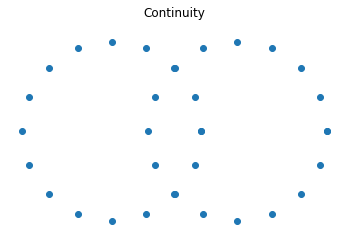

In [152]:
# 连续性
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, np.pi*2, 17)
data = [np.concatenate((np.cos(x)-.7, np.cos(x)+.7)), np.concatenate((np.sin(x), np.sin(x)))]
plt.scatter(data[0], data[1])
plt.axis('equal')
plt.axis('off')
plt.title('Continuity')
plt.show()

	    Closure


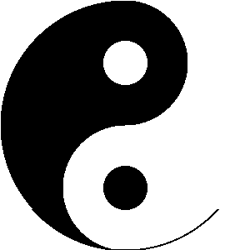

In [94]:
# 闭合性
# 应该看河坝透明人(划掉)
from matplotlib import pyplot as plt
import numpy as np
N = 300
X, coors = np.zeros((N,N)), np.meshgrid(np.arange(-N//2,N//2),np.arange(N//2,-N//2,-1))
X[:, N//2:] = 1
X = np.where(np.square(coors[0])+np.square(coors[1]-N/4)<N*N/16, 0, X)
X = np.where(np.square(coors[0])+np.square(coors[1]+N/4)<N*N/16, 1, X)
X = np.where(np.square(coors[0])+np.square(coors[1])<N*N/4, X, 1)
X = np.where(np.square(coors[0])+np.square(coors[1]-N/4)<N*N/128, 1, X)
X = np.where(np.square(coors[0])+np.square(coors[1]+N/4)<N*N/128, 0, X)
X = np.where((coors[1]<-N//3) & (np.abs(np.square(coors[0])+np.square(coors[1])-N*N/4)<N), 0, X)
X = np.array([X]*3 + [1. - X]).transpose((1,2,0)) # to RGBA

from PIL import Image 
print('\t    Closure')
Image.fromarray((X * 255).astype('uint8')).resize((250,250))

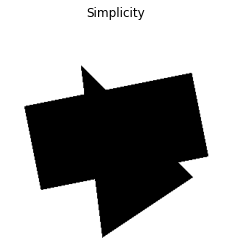

In [143]:
# 简单性
from matplotlib import pyplot as plt
import numpy as np
N = 300
X, coors = np.zeros((N,N)), np.meshgrid(np.arange(-N//2,N//2),np.arange(N//2,-N//2,-1))
X = np.where(coors[0]*8+coors[1]<-N, 1, X)
X = np.where(coors[0]+coors[1]>N/7, 1, X)
X = np.where(coors[0]-coors[1]*1.5>N/1.5, 1, X)
X = np.where(((coors[0]-coors[1]*5)<N) & ((coors[0]-coors[1]*5)>-N)\
            & ((coors[0]*5+coors[1])<2*N) & ((coors[0]*5+coors[1])>-2*N), 0, X)
plt.imshow(X, cmap = 'gray')
plt.axis('off')
plt.title('Simplicity')
plt.show()



## 视觉通道

符号标记 (marks) : 图形元素 (点线面等); 

视觉通道 (channels): 图形的表现方式 (位置,颜色,形状,大小等). 要将数据映射到视觉通道.

### 史蒂文心理物理强度定律

[史蒂文心理物理强度定律](https://www.cis.rit.edu/people/faculty/montag/vandplite/pages/chap_6/ch6p10.html) 表明人感知不同物理量的变化敏感度有差异。

人类感知降序: <font color=red>位置</font> > 长度 > 角度 / 斜度 > 大小 > 体积 > 颜色 / 亮度.

* 数值型: <font color=red>位置</font>, <font color=sienna>[长度, 角度, 斜度, 面积, 体积]</font>, <font color=SlateBlue>[密度, 饱和度, 色调, 纹理, 连接关系, 包含关系]</font>, 形状
* 有序型: <font color=red>位置</font>, <font color=sienna>[密度, 饱和度, 色调, 纹理, 连接关系, 包含关系]</font>, <font color=SlateBlue>[长度, 角度, 斜度, 面积, 体积]</font>, 形状
* 类别型: <font color=red>位置</font>, <font color=sienna>[色调, 纹理, 连接关系, 包含关系]</font>, <font color=SlateBlue>[密度, 饱和度]</font>, 形状, [长度, 角度, 斜度, 面积, 体积]

其它影响因素: 对齐、框架、距离  


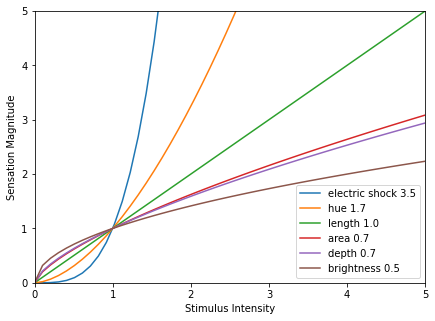

In [92]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 5, 50)
exps = [3.5, 1.7, 1., .7, .67, .5]
legends = ['electric shock', 'hue', 'length', 'area', 'depth', 'brightness']
plt.figure(figsize = (7, 5))
plt.xlim(0, 5)
plt.ylim(0, 5)
[plt.plot(x, x**exps[i]) for i in range(len(exps))]
plt.legend([_ + ' %.1f'%e for _, e in zip(legends, exps)])
# [plt.text(3 - (e > .9), min((3 - (e > .9))**e, 4.5), _ + ' %.2f'%e) for _, e in zip(legends, exps)]
plt.ylabel('Sensation Magnitude')
plt.xlabel('Stimulus Intensity')
plt.show()

#### 位置

位置是最强力的视觉通道。

缺点: 数据太多时遮挡看不清。在地图上时位置会被占用。

#### 长度 / 尺寸

长度尺寸常常是仅次于位置的视觉通道。一维 > 二维 (面积) > 三维 (体积)。

<br>

[例图](https://github.com/CeLuigi/models-comparison.pytorch/wiki/Accuracy-vs-Computational-complexity)

<img src="https://camo.githubusercontent.com/6eae3f029bf3aa568a7c330f7be894556861612d07f370e92f817369a08ab82d/68747470733a2f2f646c2e64726f70626f7875736572636f6e74656e742e636f6d2f732f6f733835667777636f67746b7379782f464c4f5053312e706e67" width="300"></src>

#### 亮度 / 饱和度

可以反映连续型数据，可用于地图等位置通道被占用的情况。


#### 颜色

可以表示类型数据。

缺点: 色盲 / 能区分的颜色种类有限
